In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create a path variable

path = r'/Users/davidcarpenter/Documents/Instacart Basket Analysis'

In [5]:
# Import the dataframe

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ex4-7-orders_products_merged.pkl'))

<Axes: xlabel='order_dow'>

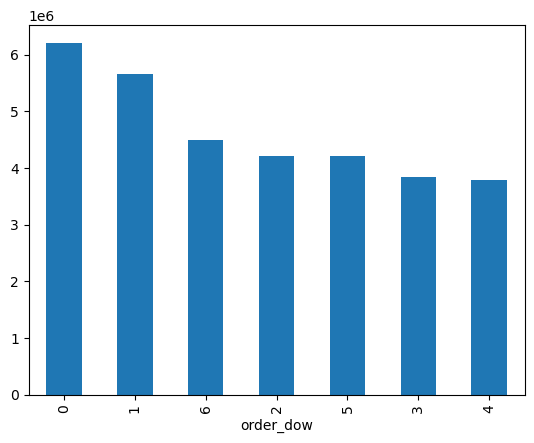

In [6]:
# View bar chart of orders by day of week; days of week start with 0 being a Saturday. The resulting bar chart
# sorts the orders by day of the week in descending order.

ords_prods_merge['order_dow'].value_counts().plot.bar()

<Axes: xlabel='order_dow'>

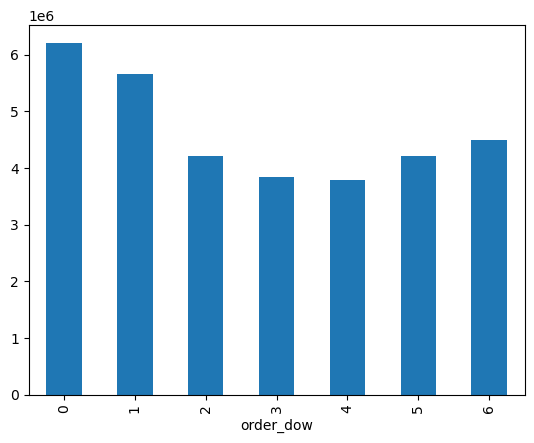

In [7]:
# View bar chart by day of week in ascending order.

ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

In [8]:
# View orders by day of week; sort by orders descending.

ords_prods_merge['order_dow'].value_counts()

order_dow
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

In [9]:
# View orders by day of week; sort by day of week ascending.

ords_prods_merge['order_dow'].value_counts().sort_index()

order_dow
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

<Axes: xlabel='order_dow'>

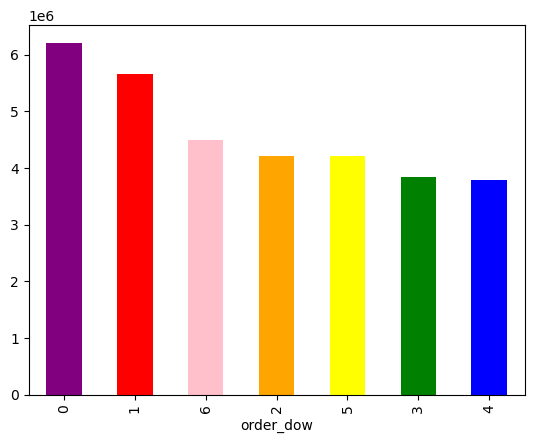

In [10]:
# View bar chart and show the bars in color.

ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

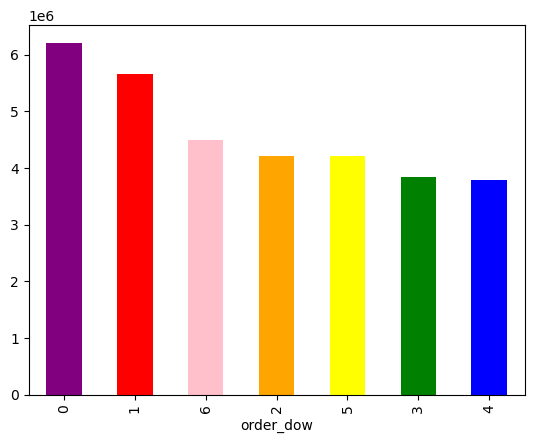

In [11]:
bar_chart = ords_prods_merge['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [12]:
bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

#### 3. Histograms

<Axes: ylabel='Frequency'>

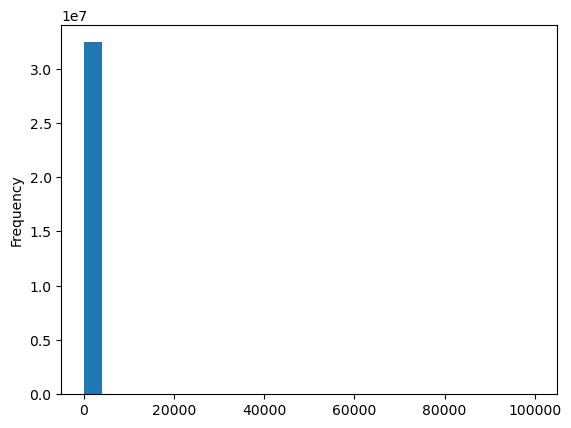

In [13]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
ords_prods_merge['prices'].mean()

11.981143922966337

In [15]:
ords_prods_merge['prices'].median()

7.4

In [16]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

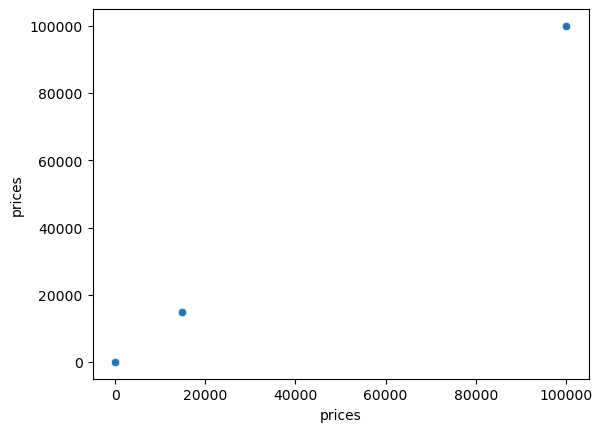

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
# Show a list of items that have prices greater than 100.

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,...,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_days,slowest_days,busiest_period_of_day
13128379,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,171,912404,17,prior,...,2,14,5.0,5,0,both,High-range product,Regularly busy,-,Most orders
13128380,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,181,603376,17,prior,...,6,16,4.0,3,1,both,High-range product,Regularly busy,-,Average orders
13128381,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1944,3264360,135,prior,...,2,21,13.0,6,0,both,High-range product,Regularly busy,-,Average orders
13128382,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,1945,892534,135,prior,...,0,8,12.0,3,1,both,High-range product,Busiest day,-,Average orders
13128383,21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,5708,229704,342,prior,...,1,19,30.0,9,0,both,High-range product,Busiest day,-,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815122,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3386542,2249946,204099,prior,...,0,8,4.0,1,0,both,High-range product,Busiest day,-,Average orders
21815123,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3386544,2363282,204099,prior,...,0,9,2.0,1,1,both,High-range product,Busiest day,-,Average orders
21815124,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3391313,3181945,204395,prior,...,3,15,8.0,25,0,both,High-range product,-,Slowest day,Most orders
21815125,33666,33664,2 % Reduced Fat Milk,84,16,99999.0,3405096,2486215,205227,prior,...,3,20,4.0,8,0,both,High-range product,-,Slowest day,Average orders


In [19]:
# Change rows that have prices greater than 100 to 'missing' values.

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [20]:
# Find the highest-priced item.

ords_prods_merge['prices'].max()

25.0

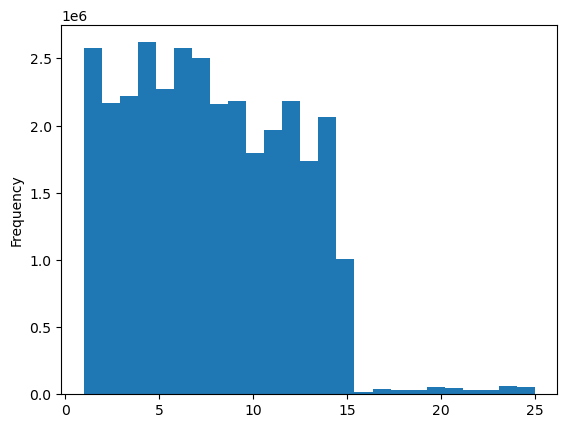

In [21]:
# Now plot the values knowing that the maximum price is 25.

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

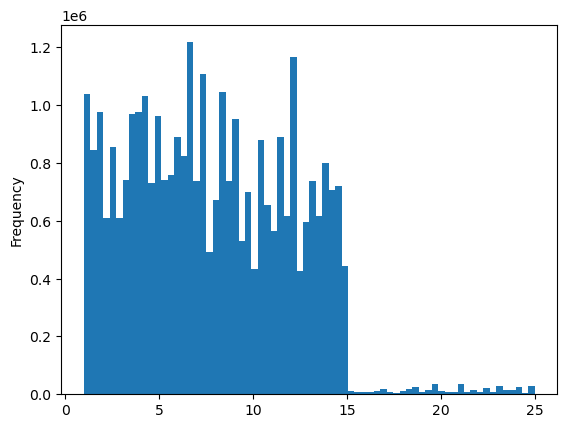

In [22]:
# Increase the number of bins to 70 for more granularity.

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [23]:
# Export the histogram.

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [24]:
# Create a list holding True/False avlues to the test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [25]:
# Store 70% of the same in the dataframe named 'big'

big = ords_prods_merge[dev]

In [26]:
# Store 30% of the same in the dataframe named 'small'

small = ords_prods_merge[~dev]

In [27]:
len(ords_prods_merge)

32434212

In [28]:
len(big) + len(small)

32434212

In [29]:
ords_prods_merge.dtypes

Unnamed: 0_x                 int64
product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
Unnamed: 0_y                 int64
order_id                     int64
user_id                      int64
eval_set                    object
order_number                 int64
order_dow                    int64
order_hour_of_day            int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
_merge                    category
price_range_loc             object
busiest_days                object
slowest_days                object
busiest_period_of_day       object
dtype: object

In [27]:
df_2 = small[['order_dow','prices']]

In [28]:
df_2 = df_2.replace([np.inf, -np.inf], np.nan)

/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/davidcarpenter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


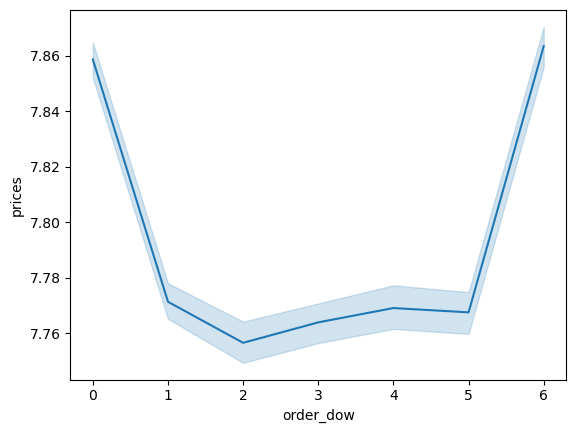

In [29]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')